# Project
### Title: Optimizing Marketing Strategies Through Data-Driven Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pulp import LpMaximize, LpProblem, LpVariable, value, LpStatus
import pulp
from scipy.stats import median_abs_deviation

## Data Importation

In [2]:
originalData = pd.read_csv("C:/Users/Chidelu/Downloads/job search/projects/Project 2/Marketing.csv")
data = originalData.copy()
data

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0.0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0.0
305,306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491.0
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


In [4]:
data.columns

Index(['id', 'c_date', 'campaign_name', 'category', 'campaign_id',
       'impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue'],
      dtype='object')

In [5]:
## Check What kind analysis can be done to achieve objectives

## Preparations and Cleaning

1. What data looks like
2. Check Missing Data
3. Check Duplicates
4. Correct Errors
5. Check for outliers
6. Filter irrelevant data/columns
7. Standardize formats

In [6]:
### What data looks like
data.head(20)

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
5,6,2021-02-01,instagram_tier1,social,9034945,444857,9540.01,1342,27,3,17943.0
6,7,2021-02-01,instagram_tier2,social,983498,511200,3648.90,2556,94,1,1981.0
7,8,2021-02-01,facebook_retargeting,social,4387490,5544,1293.55,148,3,1,4981.0
8,9,2021-02-01,facebook_lal,social,544756,56916,16997.80,596,14,2,4162.0
9,10,2021-02-01,instagram_blogger,influencer,374754,120436,23604.10,1498,49,7,39081.0


In [7]:
data.tail(20)

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
288,289,2021-02-27,google_hot,search,89459845,4662,1754.25,83,2,0,0.0
289,290,2021-02-27,google_wide,search,127823,40004,1487.24,243,5,0,0.0
290,291,2021-02-27,youtube_blogger,influencer,10934,44000,5721.83,440,15,3,23943.0
291,292,2021-02-27,instagram_tier1,social,9034945,44112,1832.16,275,6,1,5981.0
292,293,2021-02-27,instagram_tier2,social,983498,78799,254.14,503,3,0,0.0
293,294,2021-02-27,facebook_retargeting,social,4387490,667,200.42,20,0,0,0.0
294,295,2021-02-27,facebook_lal,social,544756,13693,3098.45,115,2,0,0.0
295,296,2021-02-27,instagram_blogger,influencer,374754,24018,3524.08,298,6,1,4661.0
296,297,2021-02-27,banner_partner,media,39889,182546,2791.06,426,9,1,3981.0
297,298,2021-02-28,facebook_tier1,social,349043,97200,6440.50,486,11,1,4981.0


In [8]:
### Check missing data
data.isna().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [9]:
#check duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
## Correct errors
data["campaign_name"] = data["campaign_name"].replace("facebOOK_tier2", "facebook_tier2")
data.head(30)

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
5,6,2021-02-01,instagram_tier1,social,9034945,444857,9540.01,1342,27,3,17943.0
6,7,2021-02-01,instagram_tier2,social,983498,511200,3648.90,2556,94,1,1981.0
7,8,2021-02-01,facebook_retargeting,social,4387490,5544,1293.55,148,3,1,4981.0
8,9,2021-02-01,facebook_lal,social,544756,56916,16997.80,596,14,2,4162.0
9,10,2021-02-01,instagram_blogger,influencer,374754,120436,23604.10,1498,49,7,39081.0


In [11]:
data.describe()

,id,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
count,308.000000,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,154.500000,9.605628e+06,5.122475e+06,99321.038377,9739.996753,212.918831,26.113636,1.392512e+05
std,89.056162,2.543040e+07,2.631134e+07,144008.011181,12157.476244,300.459978,42.741288,2.763031e+05
min,1.000000,1.093400e+04,6.670000e+02,169.750000,20.000000,0.000000,0.000000,0.000000e+00
25%,77.750000,1.278230e+05,1.479568e+05,9465.195000,1347.250000,20.750000,3.000000,8.580000e+03
50%,154.500000,3.747540e+05,6.028100e+05,36765.150000,4349.500000,84.000000,9.000000,3.891700e+04
75%,231.250000,4.387490e+06,3.254450e+06,129372.250000,13499.250000,270.500000,29.250000,1.370492e+05
max,308.000000,8.945984e+07,4.199700e+08,880357.000000,61195.000000,1678.000000,369.000000,2.812520e+06


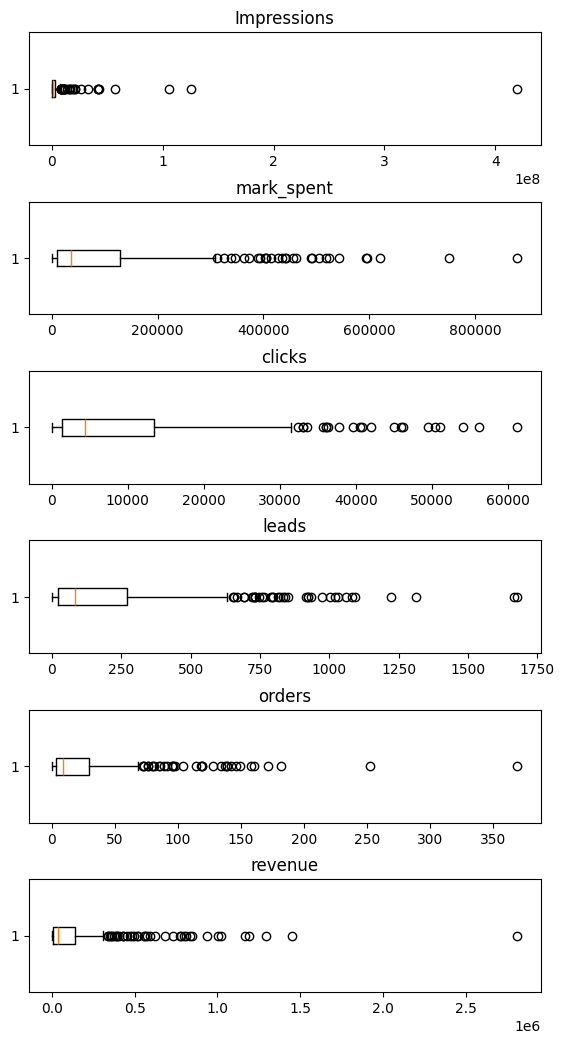

In [12]:
## check for outliers
fig, ax = plt.subplots(6)
ax[0].boxplot(data["impressions"], orientation="horizontal", label="impressions")
ax[0].set_title("Impressions")
ax[1].boxplot(data["mark_spent"], orientation="horizontal")
ax[1].set_title("mark_spent")
ax[2].boxplot(data["clicks"], orientation="horizontal")
ax[2].set_title("clicks")
ax[3].boxplot(data["leads"], orientation="horizontal")
ax[3].set_title("leads")
ax[4].boxplot(data["orders"], orientation="horizontal")
ax[4].set_title("orders")
ax[5].boxplot(data["revenue"], orientation="horizontal")
ax[5].set_title("revenue")
plt.subplots_adjust(
    left=0.1,    # space from the left of the figure
    right=0.9,   # space from the right
    top=2,     # space from the top
    bottom=0,  # space from the bottom
    wspace=0.8,  # width padding between subplots
    hspace=0.5   # height padding between subplots
)
plt.show()

In [13]:
## Remove Outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

clean_df = remove_outliers_iqr(data, data.columns[5:])
print(clean_df)
clean_df.shape
data.columns[5:]

      id      c_date         campaign_name    category  campaign_id  \
0      1  2021-02-01        facebook_tier1      social       349043   
1      2  2021-02-01        facebook_tier2      social       348934   
2      3  2021-02-01            google_hot      search     89459845   
3      4  2021-02-01           google_wide      search       127823   
4      5  2021-02-01       youtube_blogger  influencer        10934   
..   ...         ...                   ...         ...          ...   
303  304  2021-02-28       instagram_tier2      social       983498   
304  305  2021-02-28  facebook_retargeting      social      4387490   
305  306  2021-02-28          facebook_lal      social       544756   
306  307  2021-02-28     instagram_blogger  influencer       374754   
307  308  2021-02-28        banner_partner       media        39889   

     impressions  mark_spent  clicks  leads  orders  revenue  
0         148263     7307.37    1210     13       1   4981.0  
1         220688    1

Index(['impressions', 'mark_spent', 'clicks', 'leads', 'orders', 'revenue'], dtype='object')

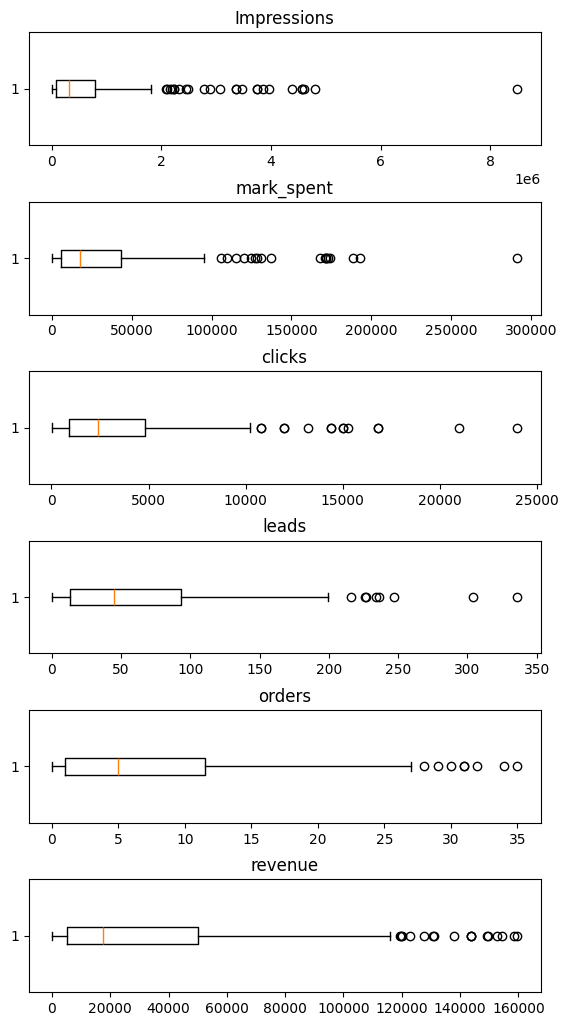

In [14]:
fig, ax = plt.subplots(6)
df_no_outliers  = clean_df
ax[0].boxplot(df_no_outliers["impressions"], orientation="horizontal", label="impressions")
ax[0].set_title("Impressions")
ax[1].boxplot(df_no_outliers["mark_spent"], orientation="horizontal")
ax[1].set_title("mark_spent")
ax[2].boxplot(df_no_outliers["clicks"], orientation="horizontal")
ax[2].set_title("clicks")
ax[3].boxplot(df_no_outliers["leads"], orientation="horizontal")
ax[3].set_title("leads")
ax[4].boxplot(df_no_outliers["orders"], orientation="horizontal")
ax[4].set_title("orders")
ax[5].boxplot(df_no_outliers["revenue"], orientation="horizontal")
ax[5].set_title("revenue")
plt.subplots_adjust(
    left=0.1,    # space from the left of the figure
    right=0.9,   # space from the right
    top=2,     # space from the top
    bottom=0,  # space from the bottom
    wspace=0.8,  # width padding between subplots
    hspace=0.5   # height padding between subplots
)
plt.show()

In [15]:
# Filter Irrelevant data
clean_data = clean_df.drop(columns=["id", "c_date", "campaign_id"])
clean_data

,campaign_name,category,impressions,mark_spent,clicks,leads,orders,revenue
0,facebook_tier1,social,148263,7307.37,1210,13,1,4981.0
1,facebook_tier2,social,220688,16300.20,1640,48,3,14962.0
2,google_hot,search,22850,5221.60,457,9,1,7981.0
3,google_wide,search,147038,6037.00,1196,24,1,2114.0
4,youtube_blogger,influencer,225800,29962.20,2258,49,10,84490.0
...,...,...,...,...,...,...,...,...
303,instagram_tier2,social,775780,760.75,1024,4,0,0.0
304,facebook_retargeting,social,1933,224.81,58,0,0,0.0
305,facebook_lal,social,25840,6844.80,248,5,1,1491.0
306,instagram_blogger,influencer,94058,4845.65,594,12,1,5008.0


## Exploratory Data Analysis

1. Use summary statistics (mean, median, mode, etc.)
2. Visualize data (charts, graphs)
3. Identify patterns, trends, and anomalies
4. Understand the structure and relationships in the data

In [16]:
## Summary statistics
clean_data.describe()

,impressions,mark_spent,clicks,leads,orders,revenue
count,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000
mean,7.408817e+05,34638.852227,3628.251185,60.886256,7.488152,35137.706161
std,1.158120e+06,44992.619733,4019.813797,61.936960,7.826305,41034.848213
min,6.670000e+02,169.750000,20.000000,0.000000,0.000000,0.000000
25%,8.228250e+04,5831.885000,903.500000,13.000000,1.000000,5276.000000
50%,3.153500e+05,17476.200000,2396.000000,45.000000,5.000000,17658.000000
75%,7.785665e+05,43626.150000,4799.000000,93.000000,11.500000,50124.500000
max,8.490000e+06,291254.000000,23991.000000,336.000000,35.000000,159620.000000


In [17]:
modifiedData = clean_data.copy()
modifiedData["CTR"] = (clean_data["clicks"] / clean_data["impressions"])
modifiedData["ROI"] = ((clean_data["revenue"] - clean_data["mark_spent"]) / clean_data["mark_spent"])
modifiedData["CPL"] = (clean_data["mark_spent"] / clean_data["leads"])
modifiedData["CPA"] = (clean_data["mark_spent"] / clean_data["orders"])
modifiedData["CPC"] = (clean_data["mark_spent"] / clean_data["clicks"])
modifiedData["CR"] = (clean_data["orders"] / clean_data["clicks"])
modifiedData["ROI($)"] = clean_data["revenue"] - clean_data["mark_spent"]
modifiedData

,campaign_name,category,impressions,mark_spent,clicks,leads,orders,revenue,CTR,ROI,CPL,CPA,CPC,CR,ROI($)
0,facebook_tier1,social,148263,7307.37,1210,13,1,4981.0,0.008161,-0.318359,562.105385,7307.37,6.039149,0.000826,-2326.37
1,facebook_tier2,social,220688,16300.20,1640,48,3,14962.0,0.007431,-0.082097,339.587500,5433.40,9.939146,0.001829,-1338.20
2,google_hot,search,22850,5221.60,457,9,1,7981.0,0.020000,0.528459,580.177778,5221.60,11.425821,0.002188,2759.40
3,google_wide,search,147038,6037.00,1196,24,1,2114.0,0.008134,-0.649826,251.541667,6037.00,5.047659,0.000836,-3923.00
4,youtube_blogger,influencer,225800,29962.20,2258,49,10,84490.0,0.010000,1.819886,611.473469,2996.22,13.269353,0.004429,54527.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,instagram_tier2,social,775780,760.75,1024,4,0,0.0,0.001320,-1.000000,190.187500,inf,0.742920,0.000000,-760.75
304,facebook_retargeting,social,1933,224.81,58,0,0,0.0,0.030005,-1.000000,inf,inf,3.876034,0.000000,-224.81
305,facebook_lal,social,25840,6844.80,248,5,1,1491.0,0.009598,-0.782170,1368.960000,6844.80,27.600000,0.004032,-5353.80
306,instagram_blogger,influencer,94058,4845.65,594,12,1,5008.0,0.006315,0.033504,403.804167,4845.65,8.157660,0.001684,162.35


In [18]:
##replace all inf
modifiedData.replace([np.inf, -np.inf], 0, inplace=True)
modifiedData.isna().sum()

campaign_name    0
category         0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
CTR              0
ROI              0
CPL              0
CPA              0
CPC              0
CR               0
ROI($)           0
dtype: int64

### Descriptive Analysis

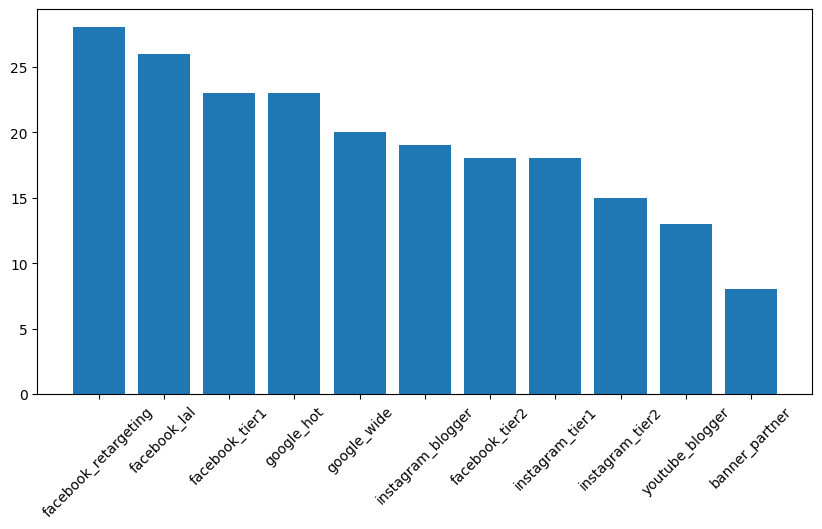

In [19]:
##Campaign_name
campaignName = modifiedData["campaign_name"].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(campaignName.index, campaignName.values)
plt.xticks(rotation=45)
plt.show()

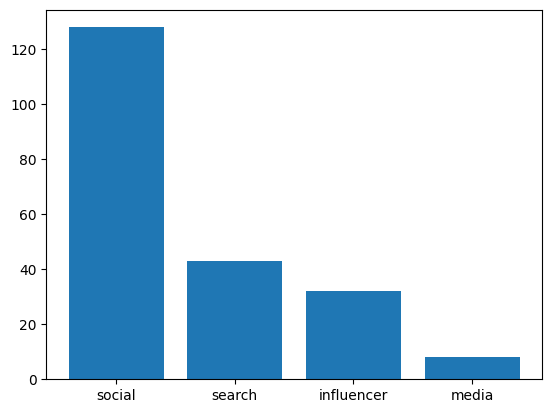

In [20]:
##Campaign Category
category = modifiedData["category"].value_counts()
fig, ax = plt.subplots()
ax.bar(category.index, category.values)
plt.show()

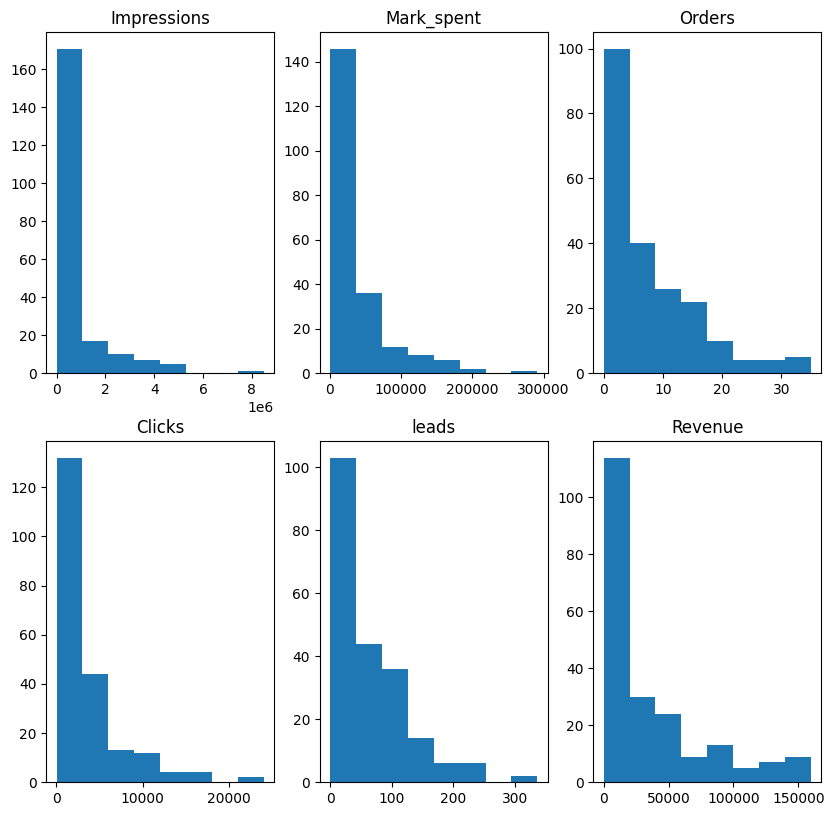

In [21]:
fig, ax = plt.subplots(2,3, figsize=(10,5))
ax[0,0].hist(modifiedData["impressions"], bins=8)
ax[0,0].set_title("Impressions")
ax[0,1].hist(modifiedData["mark_spent"], bins=8)
ax[0,1].set_title("Mark_spent")
ax[0,2].hist(modifiedData["orders"], bins=8)
ax[0,2].set_title("Orders")
ax[1,0].hist(modifiedData["clicks"], bins=8)
ax[1,0].set_title("Clicks")
ax[1,1].hist(modifiedData["leads"], bins=8)
ax[1,1].set_title("leads")
ax[1,2].hist(modifiedData["revenue"], bins=8)
ax[1,2].set_title("Revenue")

plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
)
plt.show()

In [22]:
## Total grouped by category
groupbycat = modifiedData.groupby("category")
cat_agg = groupbycat[["impressions", "mark_spent", "clicks", "leads", "orders",	"revenue"]].sum()
cat_agg

,impressions,mark_spent,clicks,leads,orders,revenue
category,,,,,,
influencer,16504202,1197452.98,143992,2262,388,2409436.0
media,24911345,224676.94,21017,480,78,294579.0
search,20681415,1194248.77,132018,2513,289,1504689.0
social,94229080,4692419.13,468534,7592,825,3205352.0


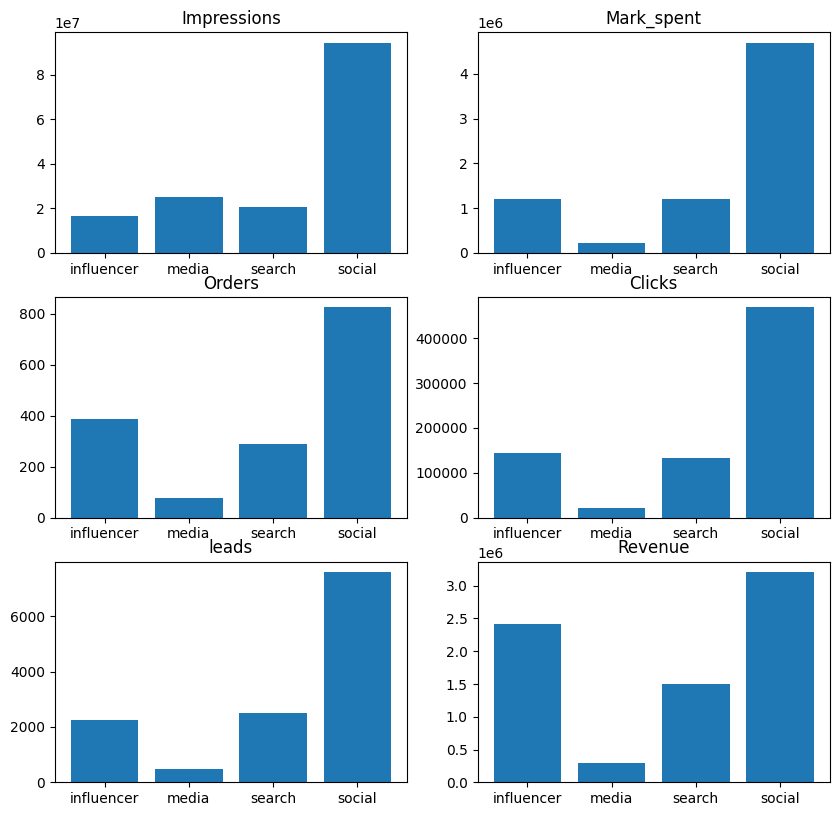

In [23]:
fig, ax = plt.subplots(3,2, figsize=(10,5))
ax[0,0].bar(cat_agg.index, cat_agg["impressions"])
ax[0,0].set_title("Impressions")
ax[0,1].bar(cat_agg.index, cat_agg["mark_spent"])
ax[0,1].set_title("Mark_spent")
ax[1,0].bar(cat_agg.index, cat_agg["orders"])
ax[1,0].set_title("Orders")
ax[1,1].bar(cat_agg.index, cat_agg["clicks"])
ax[1,1].set_title("Clicks")
ax[2,0].bar(cat_agg.index, cat_agg["leads"])
ax[2,0].set_title("leads")
ax[2,1].bar(cat_agg.index, cat_agg["revenue"])
ax[2,1].set_title("Revenue")

plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
)
plt.show()

In [24]:
##performance by category
performanceByCat = cat_agg.copy()
performanceByCat["CTR"] = performanceByCat["clicks"] / performanceByCat["impressions"]
performanceByCat["ROI"] = ((performanceByCat["revenue"] - performanceByCat["mark_spent"]) / performanceByCat["mark_spent"])
performanceByCat["CPL"] = (performanceByCat["mark_spent"] / performanceByCat["leads"])
performanceByCat["CPA"] = (performanceByCat["mark_spent"] / performanceByCat["orders"])
performanceByCat["CPC"] = (performanceByCat["mark_spent"] / performanceByCat["clicks"])
performanceByCat["CR"] = (performanceByCat["orders"] / performanceByCat["clicks"])
performanceByCat["ROI($)"] = performanceByCat["revenue"] - performanceByCat["mark_spent"]
performanceByCatDisplay = performanceByCat.iloc[:,6:].copy()
performanceByCatDisplay


,CTR,ROI,CPL,CPA,CPC,CR,ROI($)
category,,,,,,,
influencer,0.008725,1.012134,529.377975,3086.219021,8.316108,0.002695,1211983.02
media,0.000844,0.311123,468.076958,2880.473590,10.690248,0.003711,69902.06
search,0.006383,0.259946,475.228321,4132.348685,9.046106,0.002189,310440.23
social,0.004972,-0.316908,618.074174,5687.780764,10.015109,0.001761,-1487067.13


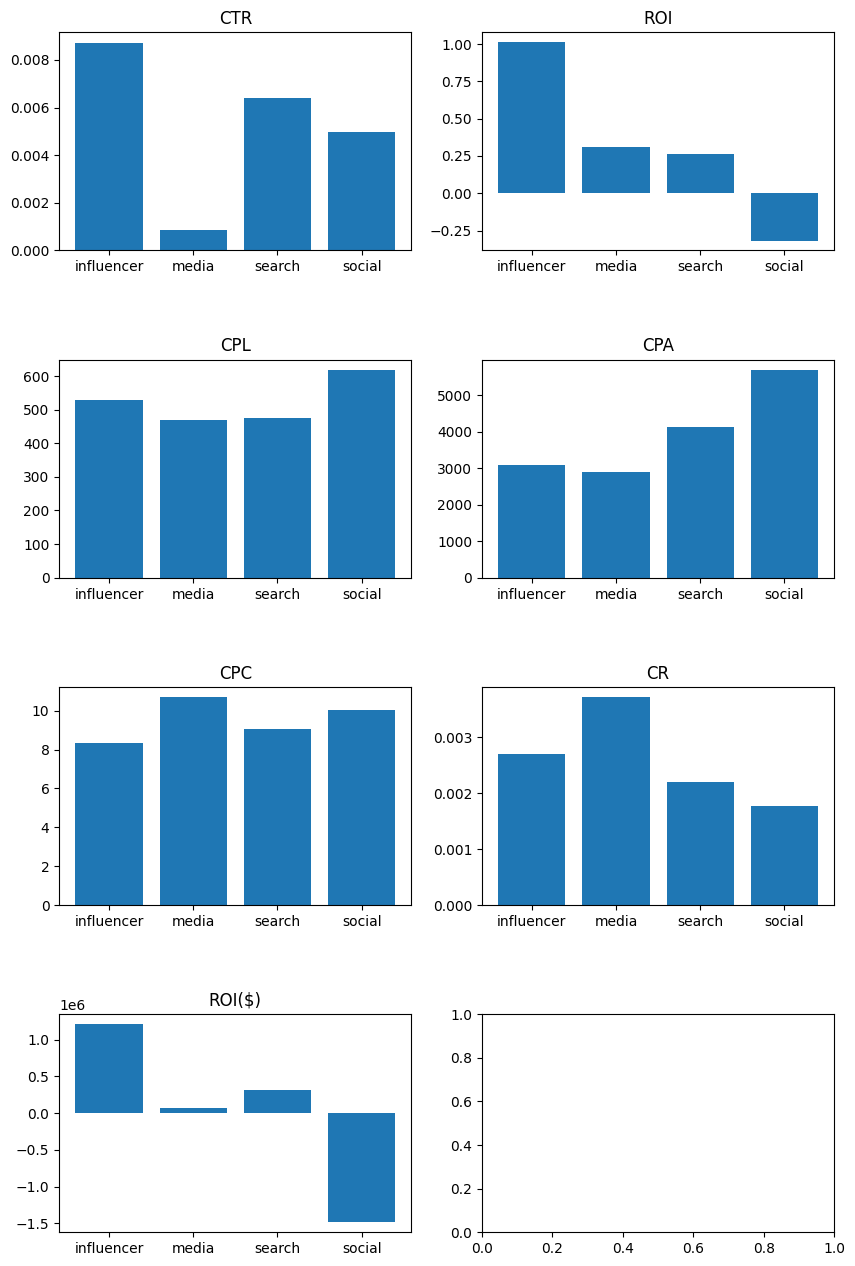

In [25]:
fig, ax = plt.subplots(4,2, figsize=(10,8))
agg = performanceByCat
ax[0,0].bar(agg.index, agg["CTR"])
ax[0,0].set_title("CTR")
ax[0,1].bar(agg.index, agg["ROI"])
ax[0,1].set_title("ROI")
ax[1,0].bar(agg.index, agg["CPL"])
ax[1,0].set_title("CPL")
ax[1,1].bar(agg.index, agg["CPA"])
ax[1,1].set_title("CPA")
ax[2,0].bar(agg.index, agg["CPC"])
ax[2,0].set_title("CPC")
ax[2,1].bar(agg.index, agg["CR"])
ax[2,1].set_title("CR")
ax[3,0].bar(agg.index, agg["ROI($)"])
ax[3,0].set_title("ROI($)")

plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
    hspace=0.5
)
plt.show()

In [26]:
## Total Number of Campaigns in each category
cat_cross = pd.crosstab(modifiedData["category"], modifiedData["campaign_name"], margins=True)
cat_cross

campaign_name,banner_partner,facebook_lal,facebook_retargeting,facebook_tier1,facebook_tier2,google_hot,google_wide,instagram_blogger,instagram_tier1,instagram_tier2,youtube_blogger,All
category,,,,,,,,,,,,
influencer,0,0,0,0,0,0,0,19,0,0,13,32
media,8,0,0,0,0,0,0,0,0,0,0,8
search,0,0,0,0,0,23,20,0,0,0,0,43
social,0,26,28,23,18,0,0,0,18,15,0,128
All,8,26,28,23,18,23,20,19,18,15,13,211


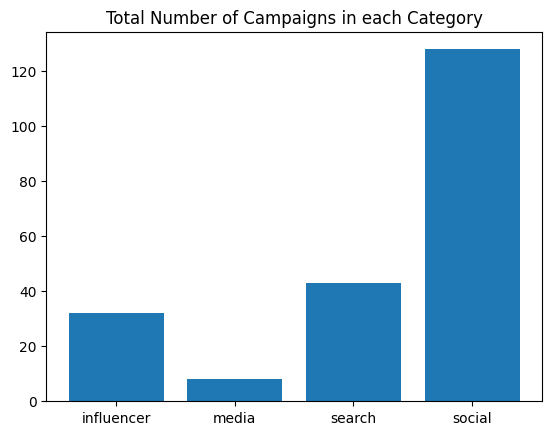

In [27]:
fig, ax = plt.subplots()
ax.bar(cat_cross.index[:4], cat_cross["All"][:4])
ax.set_title("Total Number of Campaigns in each Category")
plt.show()

## Diagnostic Analysis

In [28]:
## summary of campaigns in each category
campaignGroup = modifiedData.groupby([ "category","campaign_name",])
campaign_agg = campaignGroup[["impressions", "mark_spent", "clicks", "leads", "orders",	"revenue"]].sum()
campaign_agg

impressions  mark_spent  clicks  leads  \
category   campaign_name                                                  
influencer instagram_blogger        10603423   878410.57   98992   1457   
           youtube_blogger           5900779   319042.41   45000    805   
media      banner_partner           24911345   224676.94   21017    480   
search     google_hot                2461372   574791.16   50429    855   
           google_wide              18220043   619457.61   81589   1658   
social     facebook_lal              9800683  1855955.24   97213   1353   
           facebook_retargeting       976685   266466.22   29954    506   
           facebook_tier1           28126915  1263115.38  132006   1943   
           facebook_tier2           18707882   880765.97   75869   1619   
           instagram_tier1          22241229   328382.45   62087    945   
           instagram_tier2          14375686    97733.87   71405   1226   

                                 orders    revenue  
category   campaign_name                            
influencer instagram_blogger        225  1099167.0  
           youtube_blogger          163  1310269.0  
media      banner_partner            78   294579.0  
search     google_hot               130  1034911.0  
           google_wide              159   469778.0  
social     facebook_lal             210   194051.0  
           facebook_retargeting     108   536919.0  
           facebook_tier1           242  1185396.0  
           facebook_tier2           133   652783.0  
           instagram_tier1           98   567258.0  
           instagram_tier2           34    68945.0

In [29]:
##performance of campaigns in each cateogry
performanceByCat = campaign_agg.copy()
performanceByCat["CTR"] = performanceByCat["clicks"] / performanceByCat["impressions"]
performanceByCat["ROI"] = ((performanceByCat["revenue"] - performanceByCat["mark_spent"]) / performanceByCat["mark_spent"])
performanceByCat["CPL"] = (performanceByCat["mark_spent"] / performanceByCat["leads"])
performanceByCat["CPA"] = (performanceByCat["mark_spent"] / performanceByCat["orders"])
performanceByCat["CPC"] = (performanceByCat["mark_spent"] / performanceByCat["clicks"])
performanceByCat["CR"] = (performanceByCat["orders"] / performanceByCat["clicks"])
performanceByCat["ROI($)"] = performanceByCat["revenue"] - performanceByCat["mark_spent"]
performanceByCat2 = performanceByCat.copy()
performanceByCat = performanceByCat.iloc[:,6:].copy()
performanceByCat

CTR       ROI          CPL          CPA  \
category   campaign_name                                                        
influencer instagram_blogger     0.009336  0.251313   602.889890  3904.046978   
           youtube_blogger       0.007626  3.106880   396.325975  1957.315399   
media      banner_partner        0.000844  0.311123   468.076958  2880.473590   
search     google_hot            0.020488  0.800499   672.270363  4421.470462   
           google_wide           0.004478 -0.241630   373.617376  3895.959811   
social     facebook_lal          0.009919 -0.895444  1371.733363  8837.882095   
           facebook_retargeting  0.030669  1.014961   526.613083  2467.279815   
           facebook_tier1        0.004693 -0.061530   650.085116  5219.485041   
           facebook_tier2        0.004055 -0.258846   544.018511  6622.300526   
           instagram_tier1       0.002792  0.727431   347.494656  3350.841327   
           instagram_tier2       0.004967 -0.294564    79.717675  2874.525588   

                                       CPC        CR      ROI($)  
category   campaign_name                                          
influencer instagram_blogger      8.873551  0.002273   220756.43  
           youtube_blogger        7.089831  0.003622   991226.59  
media      banner_partner        10.690248  0.003711    69902.06  
search     google_hot            11.398028  0.002578   460119.84  
           google_wide            7.592416  0.001949  -149679.61  
social     facebook_lal          19.091636  0.002160 -1661904.24  
           facebook_retargeting   8.895848  0.003606   270452.78  
           facebook_tier1         9.568621  0.001833   -77719.38  
           facebook_tier2        11.609036  0.001753  -227982.97  
           instagram_tier1        5.289069  0.001578   238875.55  
           instagram_tier2        1.368726  0.000476   -28788.87

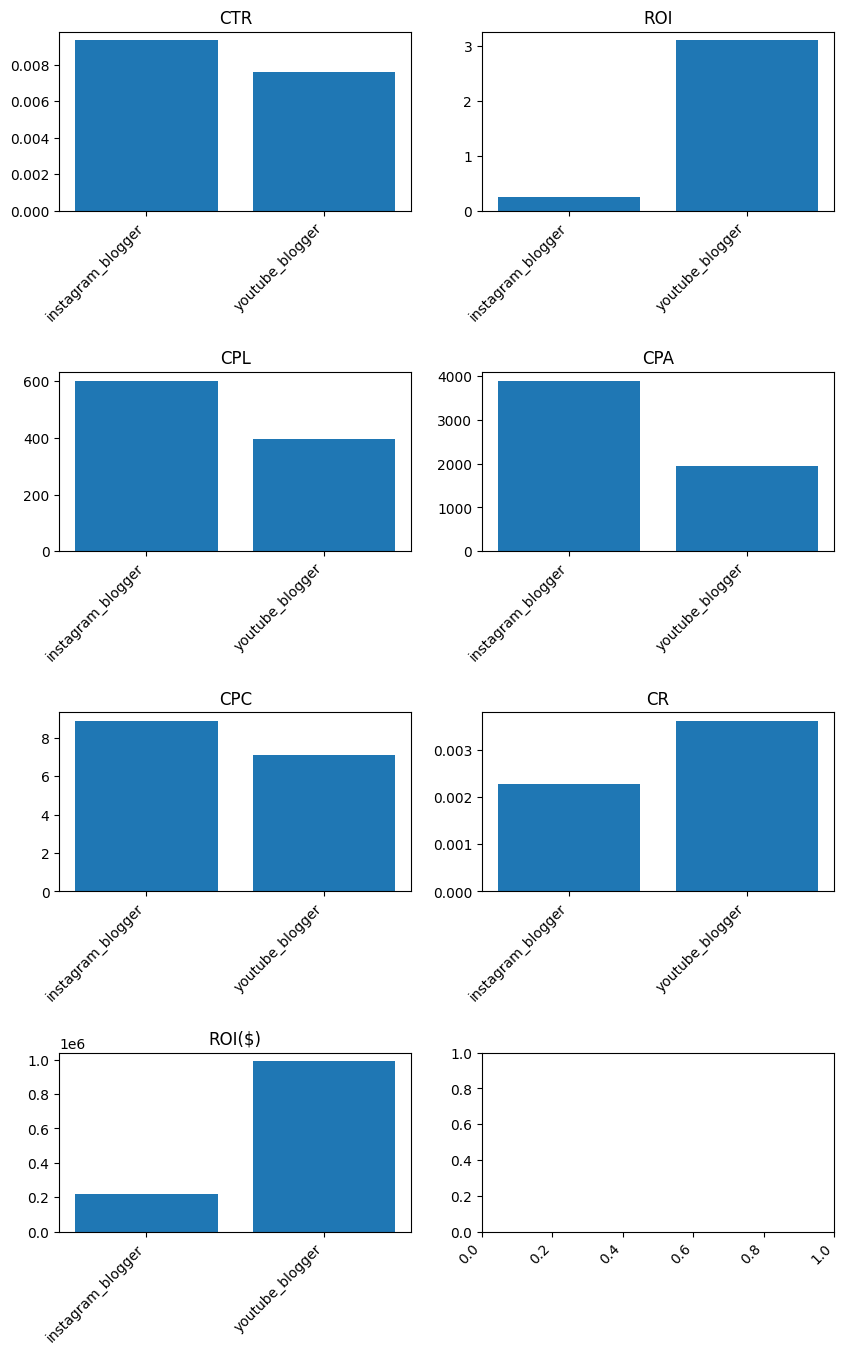

In [30]:
## Influencer category Performance
fig, ax = plt.subplots(4,2, figsize=(10,8))
agg = performanceByCat.loc["influencer"]
##influencer
ax[0,0].bar(agg.index, agg["CTR"])
ax[0,0].set_title("CTR")
ax[0,1].bar(agg.index, agg["ROI"])
ax[0,1].set_title("ROI")
ax[1,0].bar(agg.index, agg["CPL"])
ax[1,0].set_title("CPL")
ax[1,1].bar(agg.index, agg["CPA"])
ax[1,1].set_title("CPA")
ax[2,0].bar(agg.index, agg["CPC"])
ax[2,0].set_title("CPC")
ax[2,1].bar(agg.index, agg["CR"])
ax[2,1].set_title("CR")
ax[3,0].bar(agg.index, agg["ROI($)"])
ax[3,0].set_title("ROI($)")
for axs in ax.flat:
    plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
    
plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
    hspace=0.9
)
plt.show()

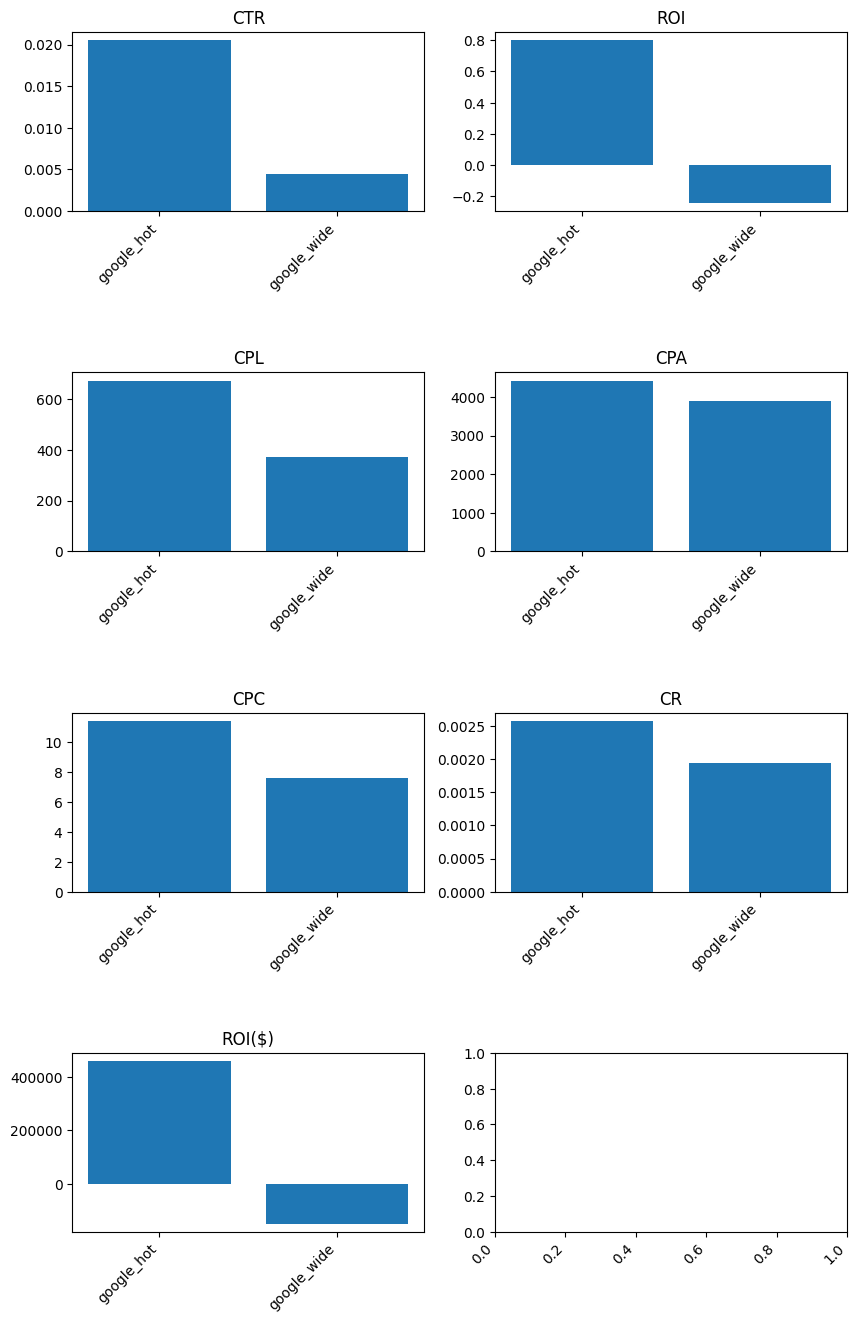

In [31]:
## Search category Performance
fig, ax = plt.subplots(4,2, figsize=(10,8))
agg = performanceByCat.loc["search"]
ax[0,0].bar(agg.index, agg["CTR"])
ax[0,0].set_title("CTR")
ax[0,1].bar(agg.index, agg["ROI"])
ax[0,1].set_title("ROI")
ax[1,0].bar(agg.index, agg["CPL"])
ax[1,0].set_title("CPL")
ax[1,1].bar(agg.index, agg["CPA"])
ax[1,1].set_title("CPA")
ax[2,0].bar(agg.index, agg["CPC"])
ax[2,0].set_title("CPC")
ax[2,1].bar(agg.index, agg["CR"])
ax[2,1].set_title("CR")
ax[3,0].bar(agg.index, agg["ROI($)"])
ax[3,0].set_title("ROI($)")
for axs in ax.flat:
    plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
    
plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
    hspace=0.9
)
plt.show()

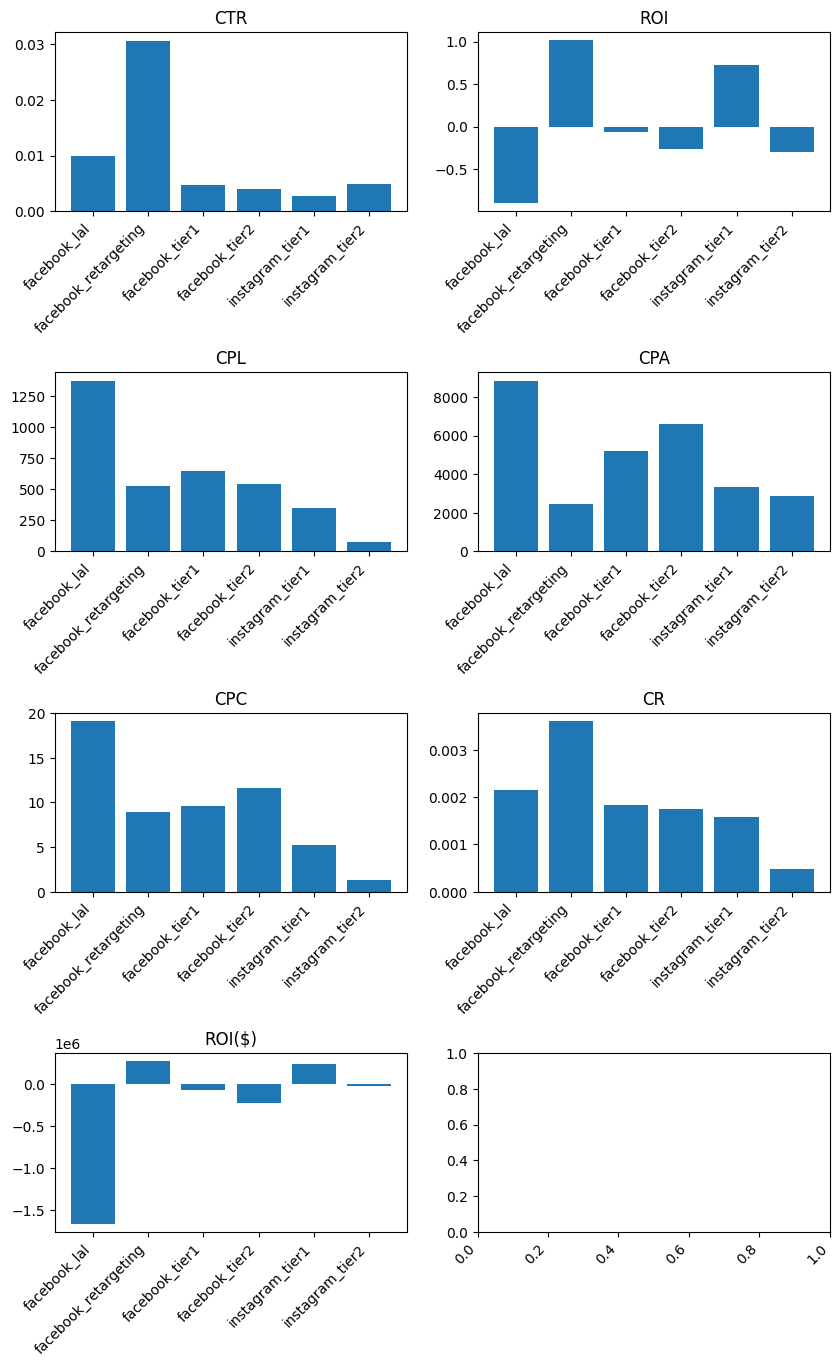

In [32]:
##Socials category Performance
fig, ax = plt.subplots(4,2, figsize=(10,8))
agg = performanceByCat.loc["social"]
ax[0,0].bar(agg.index, agg["CTR"])
ax[0,0].set_title("CTR")
ax[0,1].bar(agg.index, agg["ROI"])
ax[0,1].set_title("ROI")
ax[1,0].bar(agg.index, agg["CPL"])
ax[1,0].set_title("CPL")
ax[1,1].bar(agg.index, agg["CPA"])
ax[1,1].set_title("CPA")
ax[2,0].bar(agg.index, agg["CPC"])
ax[2,0].set_title("CPC")
ax[2,1].bar(agg.index, agg["CR"])
ax[2,1].set_title("CR")
ax[3,0].bar(agg.index, agg["ROI($)"])
ax[3,0].set_title("ROI($)")
for axs in ax.flat:
    plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
    
plt.subplots_adjust(
    top=1.5,     # space from the top
    bottom=0,  # space from the bottom
    hspace=0.9
)
plt.show()

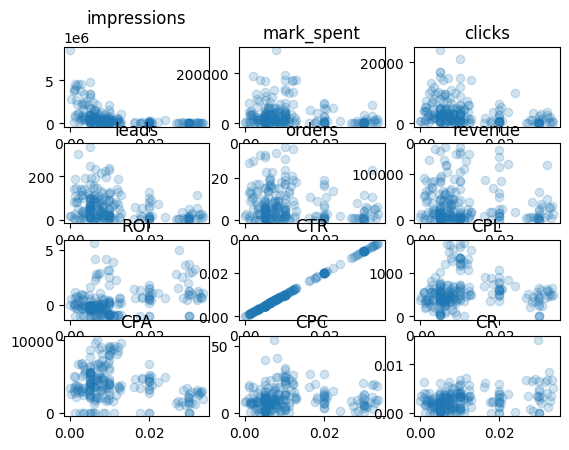

In [33]:
##Test of Linearity
fig, ax = plt.subplots(4,3)
iv = modifiedData["CTR"]
ax[0,0].scatter(iv, modifiedData["impressions"], alpha=0.2)
ax[0,0].set_title("impressions")
ax[0,1].scatter(iv, modifiedData["mark_spent"], alpha=0.2)
ax[0,1].set_title("mark_spent")
ax[0,2].scatter(iv, modifiedData["clicks"], alpha=0.2)
ax[0,2].set_title("clicks")
ax[1,0].scatter(iv, modifiedData["leads"], alpha=0.2)
ax[1,0].set_title("leads")
ax[1,1].scatter(iv, modifiedData["orders"], alpha=0.2)
ax[1,1].set_title("orders")
ax[1,2].scatter(iv, modifiedData["revenue"], alpha=0.2)
ax[1,2].set_title("revenue")
ax[2,0].scatter(iv, modifiedData["ROI"], alpha=0.2)
ax[2,0].set_title("ROI")
ax[2,1].scatter(iv, modifiedData["CTR"], alpha=0.2)
ax[2,1].set_title("CTR")
ax[2,2].scatter(iv, modifiedData["CPL"], alpha=0.2)
ax[2,2].set_title("CPL")
ax[3,0].scatter(iv, modifiedData["CPA"], alpha=0.2)
ax[3,0].set_title("CPA")
ax[3,1].scatter(iv, modifiedData["CPC"], alpha=0.2)
ax[3,1].set_title("CPC")
ax[3,2].scatter(iv, modifiedData["CR"], alpha=0.2)
ax[3,2].set_title("CR")

plt.show()

**note**: variables failed linearity test so we run decision tree or spearman correlation to determine what affects or improve ROI

In [34]:
## Correlations
modifiedData.iloc[:,2:].corr(method="spearman")

,impressions,mark_spent,clicks,leads,orders,revenue,CTR,ROI,CPL,CPA,CPC,CR,ROI($)
impressions,1.000000,0.579682,0.849761,0.732598,0.572837,0.449250,-0.729424,-0.200979,-0.085450,0.252389,-0.177514,-0.257802,-0.181401
mark_spent,0.579682,1.000000,0.711446,0.860109,0.939315,0.788297,-0.165989,-0.026092,0.459048,0.588079,0.516598,0.313874,-0.106059
clicks,0.849761,0.711446,1.000000,0.829550,0.720153,0.593579,-0.325689,-0.093443,0.054581,0.299184,-0.129927,-0.206433,-0.082626
leads,0.732598,0.860109,0.829550,1.000000,0.881344,0.753907,-0.309291,0.015110,0.053243,0.357431,0.211442,0.137693,-0.045513
orders,0.572837,0.939315,0.720153,0.881344,1.000000,0.900250,-0.118504,0.207905,0.277833,0.326274,0.396692,0.411883,0.131083
revenue,0.449250,0.788297,0.593579,0.753907,0.900250,1.000000,-0.077837,0.493102,0.156747,0.161011,0.298611,0.446528,0.428213
CTR,-0.729424,-0.165989,-0.325689,-0.309291,-0.118504,-0.077837,1.000000,0.290045,0.225124,-0.129300,0.166267,0.276669,0.260644
ROI,-0.200979,-0.026092,-0.093443,0.015110,0.207905,0.493102,0.290045,1.000000,-0.182569,-0.362033,-0.031364,0.536093,0.816871
CPL,-0.085450,0.459048,0.054581,0.053243,0.277833,0.156747,0.225124,-0.182569,1.000000,0.630179,0.677326,0.296810,-0.240613
CPA,0.252389,0.588079,0.299184,0.357431,0.326274,0.161011,-0.129300,-0.362033,0.630179,1.000000,0.511297,0.048048,-0.539831


**Notes**
Spearman correlation

ROI = Revenue and CR

CR = orders, revenues and CPC

revenue= mark_spent, clicks,leads,	orders

CPC = mark_spent, CPL, CPA

CPA = mark_spent, CPL, CPC

CPL = mark_spent, CPA, CPC

mark_spent = impressions	mark_spent	clicks	leads	orders	revenue

### Findings
**Correlation to check impact (General impact)**
Increase in Conversion Rate leads to increase in ROI  
Increase in orders, revenues and CPC increases CR which can lead to ROI  
Increase in market spend increases activities i.e impression, clicks, leads, orders and revenue but not efficiency and perfromance  
Increase in market spend doesnt directly lead to increase in ROI  
Increase in market spend reduces efficiency and performance i.e high CPC, CPL, CPA  
(For further analysis: Run decision tree since data failed regression assumptions for impact confirmation)  

Chain Reaction

market_spend -> impressions -> Clicks -> leads -> orders -> revenue -> CR -> ROI  
Which means if they dont target the right customers that converts then it affects ROI  

What category has high ROI and CR  
High ROI  
1. Influencer  

**note**: They are losing money in all category except Influencer

High CR  
1. Media  
2. Influencer  

Worse ROI and CR
1. Social Media  


What campaign by category has high ROI and CR  
1. influencer - Yotube blogger
2. search - google_hot
3. social - ROI = 1)facebok_retargeting, 2)instagram_tier1, CR = 1)facebook_retargeting, 2)facebook_tier1, 3)facebook_tier1, 4)instagram_tier1

Why is social media worse: based on correlation below:

Higher clicks and leads to lower ROI which means people click but they dont convert which means wrong targeting

Increase in spend, ctr, cpl, cpa and orders leads to increase in Conversion Rate which means it costs more to acquire the right customer whcih means more of wrong customers are targeted


**notes**: Descriptives also shows this correlation of CR and ROI except for Social media

In [35]:
## socials category correlation, Why ROI and CR is poor
performanceByCat2.loc["social"].corr(method="spearman")

,impressions,mark_spent,clicks,leads,orders,revenue,CTR,ROI,CPL,CPA,CPC,CR,ROI($)
impressions,1.000000,0.257143,0.485714,0.600000,0.257143,0.714286,-0.828571,0.085714,0.028571,0.257143,-0.085714,-0.485714,-0.142857
mark_spent,0.257143,1.000000,0.771429,0.657143,0.885714,0.428571,-0.085714,-0.371429,0.942857,0.885714,0.885714,0.428571,-0.771429
clicks,0.485714,0.771429,1.000000,0.942857,0.771429,0.371429,-0.142857,-0.600000,0.714286,0.771429,0.600000,0.028571,-0.828571
leads,0.600000,0.657143,0.942857,1.000000,0.714286,0.542857,-0.314286,-0.485714,0.600000,0.714286,0.542857,-0.085714,-0.771429
orders,0.257143,0.885714,0.771429,0.714286,1.000000,0.600000,0.085714,-0.142857,0.942857,0.657143,0.828571,0.600000,-0.600000
revenue,0.714286,0.428571,0.371429,0.542857,0.600000,1.000000,-0.542857,0.428571,0.371429,0.257143,0.314286,0.142857,-0.085714
CTR,-0.828571,-0.085714,-0.142857,-0.314286,0.085714,-0.542857,1.000000,-0.085714,0.200000,-0.257143,0.142857,0.657143,0.085714
ROI,0.085714,-0.371429,-0.600000,-0.485714,-0.142857,0.428571,-0.085714,1.000000,-0.314286,-0.657143,-0.371429,0.257143,0.828571
CPL,0.028571,0.942857,0.714286,0.600000,0.942857,0.371429,0.200000,-0.314286,1.000000,0.771429,0.942857,0.657143,-0.714286
CPA,0.257143,0.885714,0.771429,0.714286,0.657143,0.257143,-0.257143,-0.657143,0.771429,1.000000,0.828571,0.085714,-0.942857


## Predictive Analysis
Further analysis

## Prescriptive Analysis
#### Optimization using linear programming


In [36]:
##Budget Allocation for each category
budgetGrp = modifiedData.groupby("category")
budgetByCategory = budgetGrp["mark_spent"].sum()
budgetByCategory


category
influencer    1197452.98
media          224676.94
search        1194248.77
social        4692419.13
Name: mark_spent, dtype: float64

In [37]:
## total budget
total_budget = modifiedData["mark_spent"].sum()

## total revenue
total_revenue = modifiedData["revenue"].sum()

##current profit
profit = total_revenue - total_budget

##net roi = profit/spend
##gross roi = revenue/spend
##be careful of gross and net roi

net_ROI = profit/total_budget ##(net ROI)

print({"total budget": total_budget, "total revenue": total_revenue, "profit": profit})

{'total budget': np.float64(7308797.82), 'total revenue': np.float64(7414056.0), 'profit': np.float64(105258.1799999997)}


In [38]:
##ROI
ROI = performanceByCatDisplay["ROI"]
ROI

category
influencer    1.012134
media         0.311123
search        0.259946
social       -0.316908
Name: ROI, dtype: float64

In [39]:
## cost per ad for each category
grpbudget = modifiedData.groupby("category")
cost_per_ad = grpbudget["mark_spent"].median()
cost_per_ad 

category
influencer    30381.60
media         24295.15
search        15153.60
social        16189.40
Name: mark_spent, dtype: float64

In [40]:
#Purpose: To reallocate budget based on previous budget allocation by assinging the biggest to category with the highest net ROI
## to see what the revenue will look like when its maximized but keeping everything else constant
# Define the model
model = LpProblem(name="digital-marketing", sense=LpMaximize)
newBudget = total_budget

# Decision variables
x1 = LpVariable(name="Infuencer", lowBound=budgetByCategory["social"])
x2 = LpVariable(name="Media", lowBound=budgetByCategory["influencer"])
x3 = LpVariable(name="Search", lowBound=budgetByCategory["search"])
x4 = LpVariable(name="Social", lowBound=0)

# Objective function coefficients (example ROI values)
model += (1+ROI["influencer"]) * x1 + (1+ROI["media"]) * x2 + (1+ROI["search"]) * x3 + (1+ROI["social"]) * x4, "Total_ROI"

# Constraints
model += x1 + x2 + x3 + x4 == newBudget  # total budget constraint
           

# Solve
model.solve()

##Net ROI	Spend × (1 + Net ROI)	Profit is on top of the spend
##Gross ROI (ROAS)	Spend × Gross ROI	Revenue already includes spend

#output
print("Optimal Budget Allocation:")
print(f"  Influencer:    ${x1.varValue:.2f} → Expected Revenue: ${x1.varValue * (1+ ROI['influencer']):.2f}")
print(f"  Media:  ${x2.varValue:.2f} → Expected Revenue: ${x2.varValue * (1+ROI['media']):.2f}")
print(f"  Search: ${x3.varValue:.2f} → Expected Revenue: ${x3.varValue * (1+ROI['search']):.2f}")
print(f"  Social: ${x4.varValue:.2f} → Expected Revenue: ${x4.varValue * (1+ROI['social']):.2f}")
print(f"\n Total Expected Revenue: ${value(model.objective):.2f}")
print(f"budget: ${x1.varValue + x2.varValue + x3.varValue + x4.varValue}")

print(f"Expected profit: ${value(model.objective) - (x1.varValue + x2.varValue + x3.varValue + x4.varValue)}")
##print(f"Influencer: {x1.value()}, Media: {x2.value()}, Search: {x3.value()}, Social: {x4.value()}")

Optimal Budget Allocation:
  Influencer:    $4917096.10 → Expected Revenue: $9893856.84
  Media:  $1197453.00 → Expected Revenue: $1570007.62
  Search: $1194248.80 → Expected Revenue: $1504689.04
  Social: $0.00 → Expected Revenue: $0.00

 Total Expected Revenue: $12968553.50
budget: $7308797.899999999
Expected profit: $5659755.59705519


**What is the risk of investing in each category?**

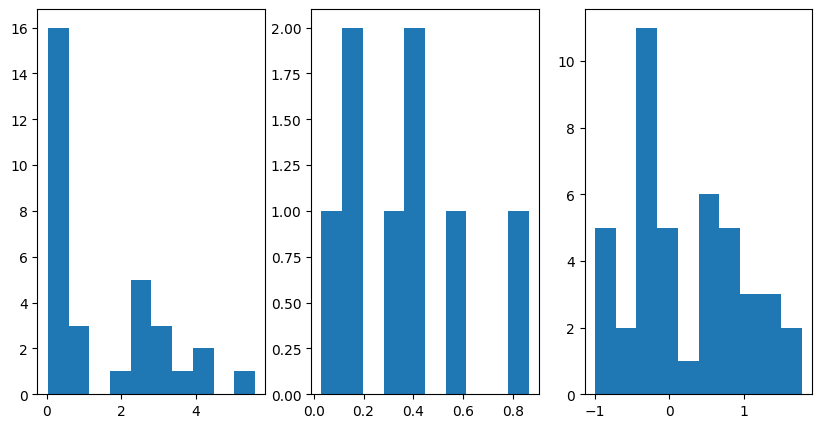

In [41]:
#Check if the data is normally distributed. If yes, use mean and SD else use median and MAD
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].hist(modifiedData.loc[modifiedData["category"] == "influencer", "ROI"])
ax[1].hist(modifiedData.loc[modifiedData["category"] == "media", "ROI"])
ax[2].hist(modifiedData.loc[modifiedData["category"] == "search", "ROI"])
plt.show()

In [42]:
#not normally distributed, use MAD as risk
def getMAD(cat):
    return median_abs_deviation(modifiedData.loc[modifiedData["category"] == cat, "ROI"], scale='normal') 

def getMedian(cat):
    return modifiedData.loc[modifiedData["category"] == cat, "ROI"].median()
def getMean(cat):
    return modifiedData.loc[modifiedData["category"] == cat, "ROI"].mean()

def getRisk(mad, median):
    return abs((mad/median))
    
influencer_mad_scaled = getMAD("influencer") #scaled to SD
media_mad_scaled = getMAD("media") 
search_mad_scaled = getMAD("search") 
social_mad_scaled = getMAD("social") 
influencer_median = getMedian("influencer")
media_median = getMedian("media")
search_median = getMean("search") #use mean to get a more realistic risk
social_median = getMedian("social")
influencer_risk = getRisk(influencer_mad_scaled, influencer_median)
media_risk = getRisk(media_mad_scaled, media_median)
search_risk = getRisk(search_mad_scaled, search_median)
social_risk = getRisk(social_mad_scaled, social_median)

pd.DataFrame({
    "Median": [influencer_median, media_median, search_median, social_median], 
    "MAD": [influencer_mad_scaled, media_mad_scaled, search_mad_scaled, social_mad_scaled],
    "Risk": [influencer_risk, media_risk, search_risk, social_risk],
    "Percentage Risk": [influencer_risk*100, media_risk*100, search_risk*100, social_risk*100]
}, index=["influencer", "media", "search", "Social"])

,Median,MAD,Risk,Percentage Risk
influencer,0.584051,0.734765,1.258049,125.804869
media,0.376200,0.317953,0.845169,84.516919
search,0.209654,0.942377,4.494913,449.491256
Social,-0.147509,1.058007,7.172480,717.248033


In [43]:
##Optimize budget alloation by maximizing profit while minimizing risk od a balance between the two

##E-contraint method

# Step 1: Define expected returns and risk scores
returns = {
    'influencer': ROI["influencer"],
    'media': ROI["media"],
    'search': ROI["search"]
}

risks = {
    'influencer': influencer_risk,
    'media': media_risk,
    'search': search_risk
}

# Step 2: Normalize risks
min_risk = min(risks.values())
max_risk = max(risks.values())

risk_influence = (risks["influencer"] - min_risk) / (max_risk - min_risk)
risk_media = (risks["media"]  - min_risk) / (max_risk - min_risk)
risk_search = (risks["search"]  - min_risk) / (max_risk - min_risk)
print({"influence":risk_influence, "media":risk_media, "search":risk_search})

# Step 3: Create the optimization problem
model = pulp.LpProblem("Maximize_Return_with_Risk_Constraint", pulp.LpMaximize)

# Step 4: Define decision variables
x_influence = pulp.LpVariable("x_influence", lowBound=0, upBound=1)
x_media = pulp.LpVariable("x_media", lowBound=0, upBound=1)
x_search = pulp.LpVariable("x_search", lowBound=0, upBound=1)

# Step 5: Objective function
model += (
    returns["influencer"] * x_influence +
    returns["media"] * x_media +
    returns["search"] * x_search,
    "Total_Return"
)

# Step 6: Total investment constraint
model += (
    x_influence + x_media + x_search == 1,
    "Total_Investment"
)

# Step 7: Risk constraint
threshold = 1
model += (
    risk_influence * x_influence +
    risk_media * x_media +
    risk_search * x_search <= threshold,
    "Risk_Constraint"
)

# Step 8: Solve
model.solve()

# Step 9: Output results
print("Status:", pulp.LpStatus[model.status])
print("\nOptimal Asset Allocation:")
print(f"  influence: {x_influence.varValue:.2%}")
print(f"  media:     {x_media.varValue:.2%}")
print(f"  search:    {x_search.varValue:.2%}")

# Step 10: Calculate total return and risk
total_return = (
    returns["influencer"] * x_influence.varValue +
    returns["media"] * x_media.varValue +
    returns["search"] * x_search.varValue
)

total_risk = (
    risks["influencer"] * x_influence.varValue +
    risks["media"] * x_media.varValue +
    risks["search"] * x_search.varValue
)

print(f"\nTotal Expected Return: {total_return:.4f}")
print(f"Total Risk Score: {total_risk:.4f}")

#optimized budget
influence_optimized = x_influence.varValue * total_budget
media_optimized = x_media.varValue * total_budget
search_optimized = x_search.varValue * total_budget

optimized_budget = pd.Series([influence_optimized, media_optimized, search_optimized, 0], index=["influencer", "media","search", "social"])
print("\n")
print(optimized_budget)

{'influence': np.float64(0.11312562496164318), 'media': np.float64(0.0), 'search': np.float64(1.0)}
Status: Optimal

Optimal Asset Allocation:
  influence: 100.00%
  media:     0.00%
  search:    0.00%

Total Expected Return: 1.0121
Total Risk Score: 1.2580


influencer    7308797.82
media               0.00
search              0.00
social              0.00
dtype: float64


#### Monte Carlo simulation
what do you want to achieve?<br>
The profit or revenue after implementing plans using LP  
Trying to simlate something close the current data

What kind of scenerio do you want to simulate?<br>
create something similar to the current situation                                             


To be able to simulate the current situation by making only the necessary change and keeping everything else constant, These are changes to be made while everything else is constant. Reason because we need to know if only the necessary changes are made what will be the outcome  
Constants:
total number of ads: 211  
total budget    
cost per ad  

Changes:  
budget allocation for category    
number of ads to run in each category    

{'influencer': 211, 'media': 0, 'search': 0, 'social': 0}
Expected Total Profit: $59,503.21
Worst Case Profit: $18.66
Best Case Profit: $682,214.72
10th Percentile Profit: $1,027.73
90th Percentile Profit: $173,402.12
Chance of Loss: 0.00%
total budget: 7308800.00%


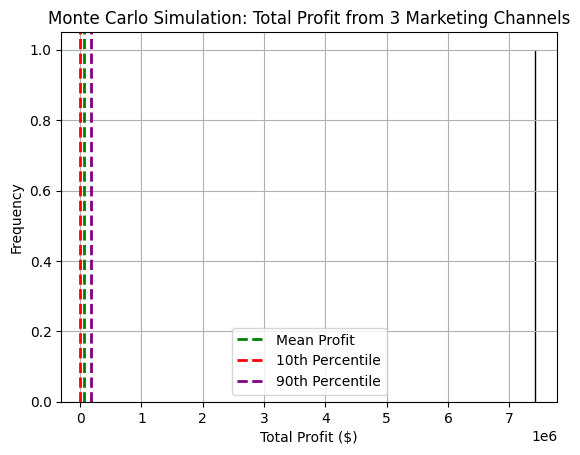

In [44]:
total_ads  = modifiedData.shape[0]

num_ads = optimized_budget/cost_per_ad

#scaling factor: scale to total number of rows/ads
factor = total_ads/num_ads.sum()
allocated_num_ads = {k: round(v * factor) for k, v in num_ads.items()}
allocated_num_ads

num_simulations = allocated_num_ads
print(num_simulations)

def getRealDataAvgStd (col, cat):
    grpByCat = modifiedData.groupby("category")
    mean = grpByCat[col].mean()
    std = grpByCat[col].std()
    minimum = grpByCat[col].min()
    maximum = grpByCat[col].max()
    return {"mean": mean[cat], "std": std[cat], "min": minimum[cat], "max":maximum[cat]}
    

def getNewBudgetMean(budget):
    return budget/2
    
# --- Clean data ---
def clean(arr, lower=0, upper=None):
    arr = np.clip(arr, lower, upper)
    return arr

def getProfit(spend, ROI):
    return spend * ROI


N_I = num_simulations["influencer"]
weights_I = np.random.dirichlet(alpha=np.ones(N_I))
budget_I = np.round(optimized_budget["influencer"] * weights_I).astype(int)
ROI_I = np.random.choice(modifiedData.loc[modifiedData["category"] == "influencer", "ROI"], size=N_I, replace=True)

influencer_profit = getProfit(budget_I, ROI_I)

# --- media ---

N_M = num_simulations["media"]
weights_M = np.random.dirichlet(alpha=np.ones(N_M))
budget_M = np.round(optimized_budget["media"] * weights_M).astype(int)
ROI_M = np.random.choice(modifiedData.loc[modifiedData["category"] == "media", "ROI"], size=N_M, replace=True)

media_profit = getProfit(budget_M, ROI_M)

# --- search ---

N_S = num_simulations["search"]
weights_S = np.random.dirichlet(alpha=np.ones(N_S))
budget_S = np.round(optimized_budget["search"] * weights_S).astype(int)
ROI_S = np.random.choice(modifiedData.loc[modifiedData["category"] == "search", "ROI"], size=N_S, replace=True)

search_profit = getProfit(budget_S, ROI_S)


# --- Total profit across channels ---
#total_profit = influencer_profit + media_profit + search_profit

total_profit = np.concatenate([influencer_profit, media_profit, search_profit])
total_budget = np.sum(np.concatenate([budget_I, budget_M, budget_S]))

# --- Analyze total profit ---
mean_profit = np.mean(total_profit)
min_profit = np.min(total_profit)
max_profit = np.max(total_profit)
pct_10 = np.percentile(total_profit, 10)
pct_90 = np.percentile(total_profit, 90)
loss_chance = np.mean(total_profit < 0) * 100

print(f"Expected Total Profit: ${mean_profit:,.2f}")
print(f"Worst Case Profit: ${min_profit:,.2f}")
print(f"Best Case Profit: ${max_profit:,.2f}")
print(f"10th Percentile Profit: ${pct_10:,.2f}")
print(f"90th Percentile Profit: ${pct_90:,.2f}")
print(f"Chance of Loss: {loss_chance:.2f}%")

print(f"total budget: {np.sum(total_budget):.2f}%")
# --- Plot total profit distribution ---
plt.hist(total_revenue, bins=50, color='skyblue', edgecolor='black')
plt.title('Monte Carlo Simulation: Total Profit from 3 Marketing Channels')
plt.xlabel('Total Profit ($)')
plt.ylabel('Frequency')
plt.axvline(mean_profit, color='green', linestyle='dashed', linewidth=2, label='Mean Profit')
plt.axvline(pct_10, color='red', linestyle='dashed', linewidth=2, label='10th Percentile')
plt.axvline(pct_90, color='purple', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
modifiedData.columns

Index(['campaign_name', 'category', 'impressions', 'mark_spent', 'clicks',
       'leads', 'orders', 'revenue', 'CTR', 'ROI', 'CPL', 'CPA', 'CPC', 'CR',
       'ROI($)'],
      dtype='object')